In [1]:
# Import libraries
import pandas as pd
from data_processing import topic_modeling_on_assay_descriptions_w_lda, topic_modeling_on_assay_descriptions_w_bert

/tmp/3325833.1.all.q/ipykernel_115640/414914460.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/data/home/bty414/group_project_chembl/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
processed_data = pd.read_csv("processed_data.csv")
descriptions = processed_data.description.to_list()

In [3]:
import re

# Remove punctuation
processed_data['descriptions_processed'] = \
processed_data['description'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
processed_data['descriptions_processed'] = \
processed_data['descriptions_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
processed_data['descriptions_processed'].head()

0    in vitro anticancer activity against 2 nci scl...
1    in vitro anticancer activity against 2 nci scl...
2    in vitro anticancer activity against 2 nci scl...
3    in vitro anticancer activity against 11 nci ns...
4    in vitro anticancer activity against 11 nci ns...
Name: descriptions_processed, dtype: object

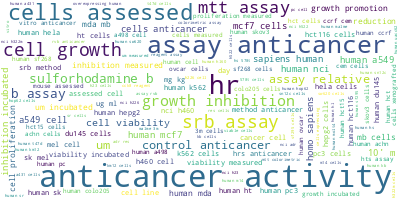

In [4]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(processed_data['descriptions_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [8]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Unzipping corpora/stopwords.zip.



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [24]:
import gensim # open-source library for unsupervised topic modeling and NLP
from gensim.utils import simple_preprocess
import nltk # Natural Language Toolkit is a library to work with human language data

# Storing a list of stopwords
from nltk.corpus import stopwords 
stop_words = stopwords.words('english') # Selecting english stopwords
stop_words.extend(['anticancer', 'activity']) # adding new stopwords

# Defining a function to convert our descriptions to word tokens and remove ponctuation
def sent_to_words(descriptions):
    i = 0
    for description in descriptions:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(description), deacc=True)) 
        
# Defining a function to remove stopwords    
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
        
data = processed_data.descriptions_processed.tolist()
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)

In [25]:
print(data_words[0:100]) #Showing our first description tokens

[['vitro', 'nci', 'sclc', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'sclc', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'sclc', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'nsclc', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'nsclc', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'nsclc', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'ovarian', 'cancer', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'ovarian', 'cancer', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'ovarian', 'cancer', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'cns', 'cancer', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'cns', 'cancer', 'cell', 'lines', 'inactive'], ['vitro', 'nci', 'cns', 'cancer', 'cell', 'lines', 'inactive'], ['one', 'renal', 'cancer', 'cell', 'line'], ['vitro', 'cultured', 'human', 'tumor', 'lung', 'cell', 'line'], ['vitro', 'cultured', 'human', 'tumor', 'lung', 'cell', 'line'], ['vitro', 'cultured', 'human', 'tumor', 'lung', 'cell', 'line'], ['vitro', 'cultured', 'human', 

In [26]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words

# Term Document Frequency
# Converts a collection of words to  a list of (word_id, word_frequency) 2-tuples.
corpus = [id2word.doc2bow(text) for text in texts]

In [27]:
# View first description
print(corpus[2])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [29]:
from pprint import pprint
# number of topics
num_topics = 50
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       random_state=0)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(6,
  '0.116*"cells" + 0.111*"human" + 0.087*"assay" + 0.079*"hrs" + '
  '0.065*"assessed" + 0.055*"cell" + 0.050*"growth" + 0.043*"srb" + '
  '0.031*"inhibition" + 0.025*"um"'),
 (25,
  '0.107*"human" + 0.103*"cells" + 0.098*"assay" + 0.087*"hrs" + '
  '0.058*"assessed" + 0.050*"cell" + 0.048*"growth" + 0.039*"sulforhodamine" + '
  '0.035*"um" + 0.034*"relative"'),
 (24,
  '0.102*"cells" + 0.102*"human" + 0.095*"assay" + 0.064*"cell" + '
  '0.062*"assessed" + 0.057*"hrs" + 0.048*"srb" + 0.038*"mtt" + 0.036*"growth" '
  '+ 0.033*"sapiens"'),
 (27,
  '0.116*"cells" + 0.109*"human" + 0.073*"assay" + 0.063*"assessed" + '
  '0.055*"hrs" + 0.047*"cell" + 0.044*"growth" + 0.044*"srb" + '
  '0.034*"inhibition" + 0.028*"um"'),
 (12,
  '0.095*"cells" + 0.094*"human" + 0.085*"assay" + 0.078*"assessed" + '
  '0.076*"cell" + 0.072*"hrs" + 0.051*"growth" + 0.037*"srb" + '
  '0.030*"relative" + 0.030*"control"'),
 (2,
  '0.119*"cells" + 0.114*"human" + 0.067*"assay" + 0.059*"hrs" + '
  '0.051*"asse

In [ ]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))



In [12]:
topics, probabilities = topic_modeling_on_assay_descriptions_w_bert(descriptions)

config_sentence_transformers.json: 100%|██████████| 116/116 [00:00<00:00, 193kB/s]
README.md: 100%|██████████| 10.6k/10.6k [00:00<00:00, 23.1MB/s]
sentence_bert_config.json: 100%|██████████| 53.0/53.0 [00:00<00:00, 123kB/s]
config.json: 100%|██████████| 612/612 [00:00<00:00, 1.05MB/s]
pytorch_model.bin: 100%|██████████| 90.9M/90.9M [00:00<00:00, 229MB/s]
tokenizer_config.json: 100%|██████████| 350/350 [00:00<00:00, 521kB/s]
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 1.56MB/s]
tokenizer.json: 100%|██████████| 466k/466k [00:00<00:00, 2.09MB/s]
1_Pooling/config.json: 100%|██████████| 190/190 [00:00<00:00, 434kB/s]
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just

TypeError: cannot unpack non-iterable NoneType object

In [1]:
print("topic_modeling_on_assay_descriptions" in dir())

False
